In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv("anime_clean.csv", encoding="utf8")
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
0,2366,https://myanimelist.net/anime/2366/Touma_Kishi...,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4940,https://myanimelist.net/anime/4940/Sabaku_no_K...,Sabaku no Kaizoku! Captain Kuppa,Sometime in the future,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50285,https://myanimelist.net/anime/50285/On_Air_Dek...,On Air Dekinai!,Set in 2014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3975,https://myanimelist.net/anime/3975/Uchi_no_3_S...,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36036,https://myanimelist.net/anime/36036/Running_Man,Running Man,The Soul Tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data

In [3]:
data = data.dropna(subset=['genres'])
data = data.dropna(subset=['source_type'])
data = data.dropna(subset=['studios'])
data = data.dropna(subset=['score'])
data.isnull().sum()


anime_id                  0
anime_url                 0
title                     0
synopsis                  1
main_pic                  0
type                      0
source_type               0
num_episodes             21
status                    0
start_date                0
end_date                 27
season                 1721
studios                   0
genres                    0
score                     0
score_count               0
score_rank              309
popularity_rank           0
members_count             0
favorites_count           0
watching_count            0
completed_count           0
on_hold_count             0
dropped_count             0
plan_to_watch_count       0
total_count               0
score_10_count            0
score_09_count            0
score_08_count            0
score_07_count            0
score_06_count            0
score_05_count            0
score_04_count            0
score_03_count            0
score_02_count            0
score_01_count      

In [4]:
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
696,39572,https://myanimelist.net/anime/39572/Wangu_Xian...,Wangu Xian Qiong III: Eren Gu Pian,Third season of .,https://cdn.myanimelist.net/images/anime/1873/...,TV,Novel,13.0,Finished Airing,3/8/2019 0:00,...,25.0,53.0,28.0,11.0,6.0,5.0,4.0,1.0,42215|78730,https://cdn.myanimelist.net/images/anime/1873/...
732,4504,https://myanimelist.net/anime/4504/Kinkyuu_Has...,Kinkyuu Hasshin Saver Kids,Matsugorou is a vile doctor who plots out a pl...,https://cdn.myanimelist.net/images/anime/10/88...,TV,Original,50.0,Finished Airing,2/19/1991 0:00,...,20.0,46.0,32.0,26.0,12.0,4.0,1.0,4.0,7373|5441|19782,https://cdn.myanimelist.net/images/anime/4/861...
739,3114,https://myanimelist.net/anime/3114/Chiisana_Ky...,Chiisana Kyojin Microman,3 kids meet 5 micro-sized superheroes from ano...,https://cdn.myanimelist.net/images/anime/1058/...,TV,Other,52.0,Finished Airing,1/4/1999 0:00,...,12.0,48.0,36.0,27.0,12.0,6.0,7.0,4.0,7373|17397|11712|70786,https://cdn.myanimelist.net/images/anime/4/474...
740,2741,https://myanimelist.net/anime/2741/Monkey_Turn_V,Monkey Turn V,Sequel to .,https://cdn.myanimelist.net/images/anime/4/752...,TV,Manga,25.0,Finished Airing,7/4/2004 0:00,...,25.0,32.0,29.0,13.0,8.0,5.0,3.0,4.0,149|33601,https://cdn.myanimelist.net/images/anime/4/752...
742,44273,https://myanimelist.net/anime/44273/Mewkledrea...,Mewkledreamy Mix!,Second season of .,https://cdn.myanimelist.net/images/anime/1313/...,TV,Other,50.0,Currently Airing,4/11/2021 0:00,...,24.0,35.0,17.0,16.0,5.0,3.0,1.0,4.0,27907,https://cdn.myanimelist.net/images/anime/1610/...


In [5]:
scaler = MinMaxScaler()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = data[['score','genres','studios']].copy()

df_with_id = data[['anime_id','title','score','genres','studios']].copy()

df['score'] = scaler.fit_transform(df[['score']])
df['genres'] = df['genres'].str.replace('|',', ')
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')

df_with_id['score'] = scaler.fit_transform(df_with_id[['score']])
df_with_id['genres'] = df_with_id['genres'].str.replace('|',', ')
df_with_id['genres'] = df_with_id['genres'].str.split(', ')
df_with_id = df_with_id.explode('genres')


df['genres'] = le.fit_transform(df['genres'])
df['studios'] = le.fit_transform(df['studios'])

df_with_id['genres'] = le.fit_transform(df_with_id['genres'])
df_with_id['studios'] = le.fit_transform(df_with_id['studios'])

# df = pd.get_dummies(df, columns=["genres", "studios"])

df['score'].describe()



C:\Users\mrput\AppData\Local\Temp\ipykernel_14912\553751299.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|',', ')
C:\Users\mrput\AppData\Local\Temp\ipykernel_14912\553751299.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_with_id['genres'] = df_with_id['genres'].str.replace('|',', ')


count    5585.000000
mean        0.697540
std         0.125112
min         0.000000
25%         0.620968
50%         0.709677
75%         0.791935
max         1.000000
Name: score, dtype: float64

In [6]:
print(len(df))
print(len(df_with_id))

5585
5585


In [7]:
df.isnull().count()
# df.head()

score      5585
genres     5585
studios    5585
dtype: int64

In [8]:
df

,score,genres,studios
696,0.724194,1,17
696,0.724194,5,17
696,0.724194,10,17
732,0.653226,0,379
732,0.653226,1,379
...,...,...,...
13375,0.793548,8,1
13377,0.695161,1,338
13377,0.695161,5,338
13377,0.695161,10,338


C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

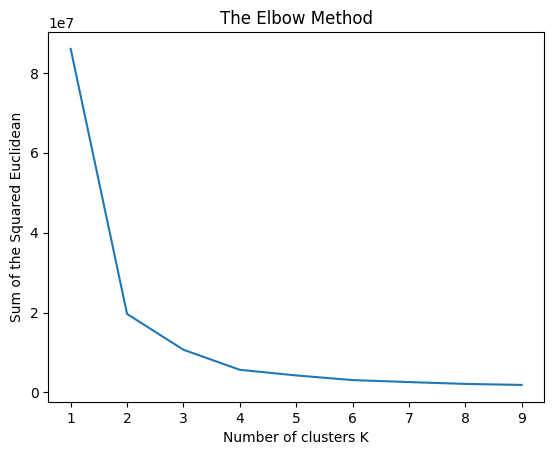

In [9]:
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(df)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [10]:
model = KMeans(n_clusters=3)
model.fit(df)

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.5578429973311949

In [12]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(df, model.labels_)
print(dbs)

0.5656115390497017


In [13]:
df_with_id.head()


,anime_id,title,score,genres,studios
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,1,17
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,5,17
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,10,17
732,4504,Kinkyuu Hasshin Saver Kids,0.653226,0,379
732,4504,Kinkyuu Hasshin Saver Kids,0.653226,1,379


# Find where new point is locate in which cluster and find distance between points from chosen point

## Convert input to encode data

In [22]:
anime_name = str(input("What's the aniname >"))
if anime_name in df_with_id['title'].values:
    row = df_with_id[df_with_id['title'] == anime_name].copy().drop_duplicates(subset='anime_id')


row

,anime_id,title,score,genres,studios
7014,40097,Tenchi Muyou! Ryououki 5th Season,0.674194,0,14


In [ ]:
encoded = row[['score','genres','studios']].values
print(encoded)

[[ 0.72419355  1.         17.        ]]


In [ ]:
from scipy.spatial.distance import cdist
# new_point = np.array([[row[['score','genres','studios']].values]])
nearest_cluster  = model.predict(encoded)

# current data is from 696
cluster_recommended_data = df[model.labels_ == nearest_cluster]

top5 = []

for index, row in cluster_recommended_data.iterrows():
    cluster_point = np.array([[row['score'], row['genres'], row['studios']]])
    distance = cdist(encoded, cluster_point)
    
    # Add the index and distance to top5 list
    top5.append((index, distance[0][0]))

# Sort the top5 list based on distance
top5.sort(key=lambda x: x[1])

# Keep only the top 5 unique distances and remove duplicates
unique_distances = set()
filtered_top5 = []
for idx, dist in top5:
    if dist not in unique_distances:
        filtered_top5.append((idx, dist))
        unique_distances.add(dist)
    if len(filtered_top5) >= 5:
        break

print(filtered_top5)
    

[(696, 0.0), (5189, 0.01774193548387104), (5669, 2.8305527969490933), (866, 3.000472127261379), (7014, 3.162672920173694)]


C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
top5_ids = []
for item in filtered_top5:
    top5_ids.append(item[0])

final_df = df_with_id.loc[top5_ids].copy()
final_df = final_df.drop_duplicates(subset='anime_id')

final_df

,anime_id,title,score,genres,studios
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,1,17
5189,37294,Wangu Xian Qiong II,0.741935,1,17
5669,42044,Minegishi-san wa Ootsu-kun ni Tabesasetai,0.614516,3,15
866,4067,Shin Megami Tensei Devil Children,0.670968,0,20
7014,40097,Tenchi Muyou! Ryououki 5th Season,0.674194,0,14
